## Business Understanding 


1. **ID:** Unique number to represent patient ID.  It is crucial for tracking and referencing individual patient records.

2. **PRG:** Plasma glucose.Plasma glucose levels are an important indicator of a patient's blood sugar levels. Abnormal glucose levels may be associated with conditions such as diabetes, which can have implications for overall health.

3. **PL:** Blood Work Result-1 (mu U/ml).This could represent the measurement of a specific biomarker or substance in the blood, potentially related to organ function, hormonal levels, or other health indicators.

4. **PR:** Blood Pressure (mm Hg).Blood pressure is a vital sign that provides information about the force of blood against the walls of the arteries. Abnormal blood pressure levels can indicate cardiovascular health issues.

5. **SK:** Blood Work Result-2 (mm).Similar to Blood Work Result-1, this could represent the measurement of a specific parameter in the blood, which may be relevant to various physiological functions.

6. **TS:** Blood Work Result-3 (mu U/ml). Similar to Blood Work Result-1 and Blood Work Result-2, this represents the measurement of a specific substance in the blood, potentially associated with different health factors.

7. **M11:**  Body mass index (weight in kg/(height in m)^2).BMI is a measure of body fat based on weight and height. It is often used to assess whether an individual is underweight, normal weight, overweight, or obese.

8. **BD2:** Blood Work Result-4 (mu U/ml).Similar to other blood work results, this represents the measurement of a specific biomarker or substance in the blood.

9. **Age:** patients age (years).Age is a fundamental demographic factor that can influence various health conditions and their management.
10. **Insurance:** If a patient holds a valid insurance card. The insurance provides information about whether patients have insurance coverage, which can impact access to healthcare services and the financial aspects of medical care.

11. **Sepsis:** TPositive: if a patient in ICU will develop a sepsis , and Negative: otherwise. Sepsis is a potentially life-threatening condition caused by the body's response to infection. This indicates whether a patient in the intensive care unit (ICU) is predicted to develop sepsis or not based on certain criteria.



Goal: To bulid a machine learning model to predict if a patients  will  develop a sepsis or not in the ICU.

Alternative Hypothesis: There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not.

Null Hypothesis: There is no significant difference in plasma glucose levels between patients who develop sepsis and those who do not.

Analytical Questions:
1. Is there a relationship between plasma glucose levels and the development of sepsis?
2. What factors are associated with higher blood pressure in the ICU setting?
3. Are there specific factors (e.g., blood work results, BMI, age) associated with the development of sepsis?
4. Identify any trends or patterns in the data related to patient characteristics?

## Data Understanding

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#### Load dataset

In [2]:
df= pd.read_csv("C:/P6/P6/data/Paitients_Files_Train.csv")

In [3]:
test= pd.read_csv("C:/P6/P6/data/Paitients_Files_Test.csv")

In [4]:
df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [5]:
test

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
...,...,...,...,...,...,...,...,...,...,...
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df['Sepssis'].unique()

array(['Positive', 'Negative'], dtype=object)

In [7]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64],
      dtype=int64)

In [8]:
df['Insurance'].unique()

array([0, 1], dtype=int64)

#### EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [10]:
#columns_to_convert = ['M11', 'BD2']
# Convert selected columns from float to int
#df[columns_to_convert] = df[columns_to_convert].astype(int)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [12]:
#columns_to_convert = ['M11', 'BD2']
# Convert selected columns from float to int
#test[columns_to_convert] = test[columns_to_convert].astype(int)

In [13]:
df.duplicated().sum()

0

In [14]:
test.duplicated().sum()

0

In [15]:
df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [16]:
test.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


#### Univariate Analysis 

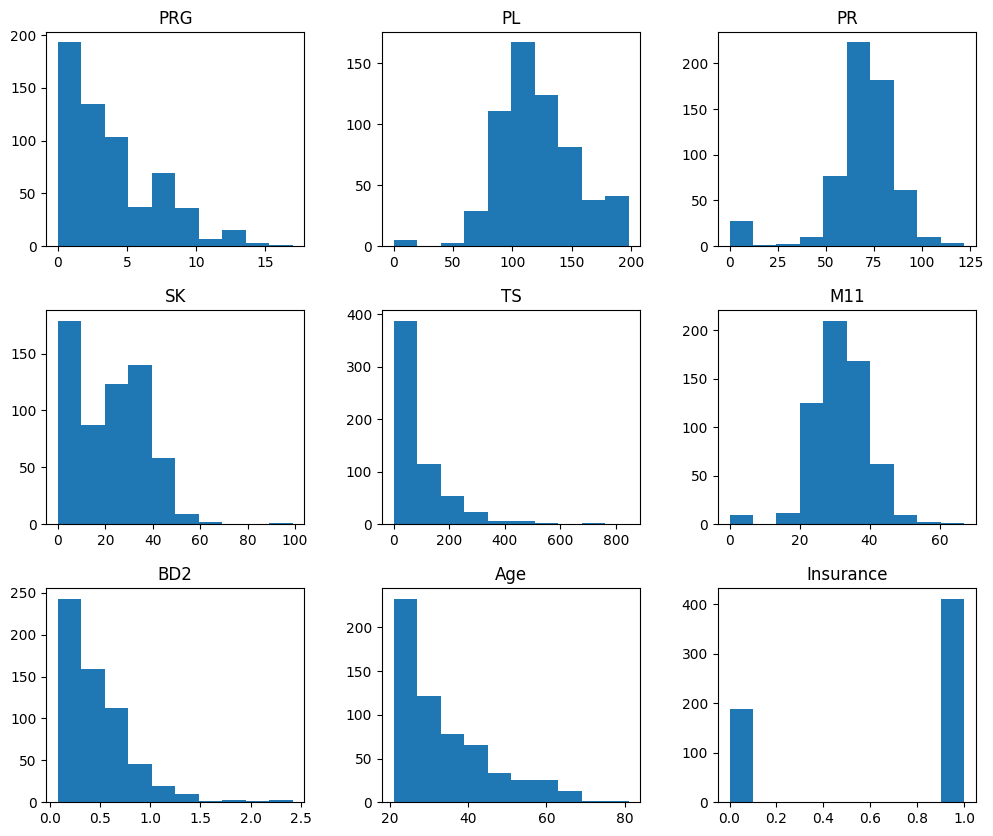

In [18]:
df.hist(figsize=(12,10),grid=False)
plt.show()

the insurance plot shows that the number of patience that insurace is higher than those with no insurance for treatment. the age plot also show a right the BD2, age and ts are positive skewed 

<Axes: >

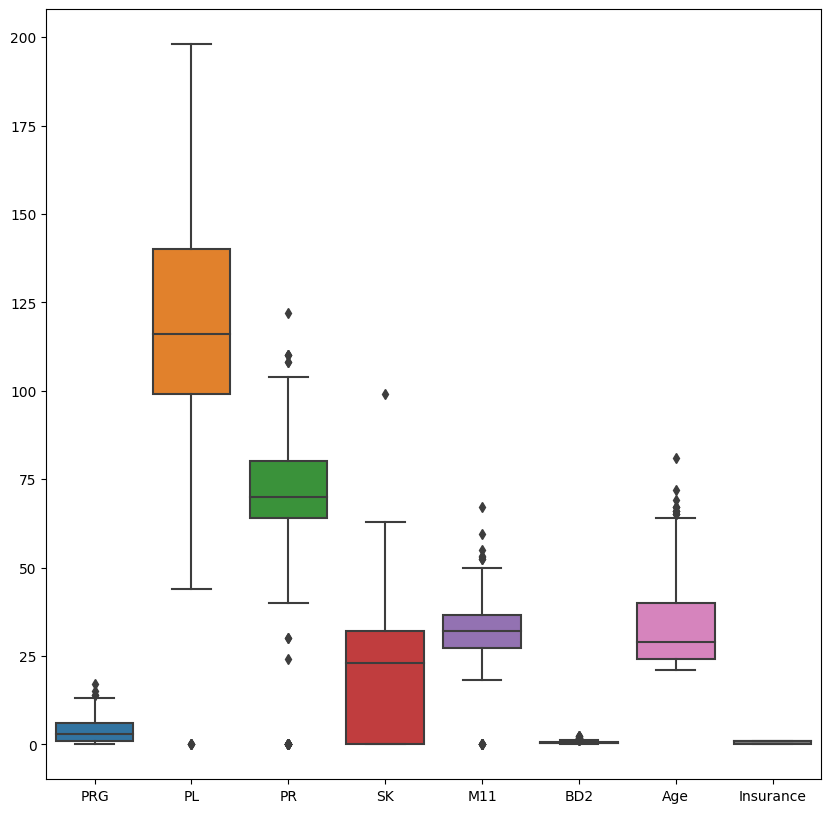

In [19]:
df_without_TS= df.drop(['TS'], axis=1)
plt.figure(figsize=(10,10))
sns.boxplot(data=df_without_TS)

<Axes: >

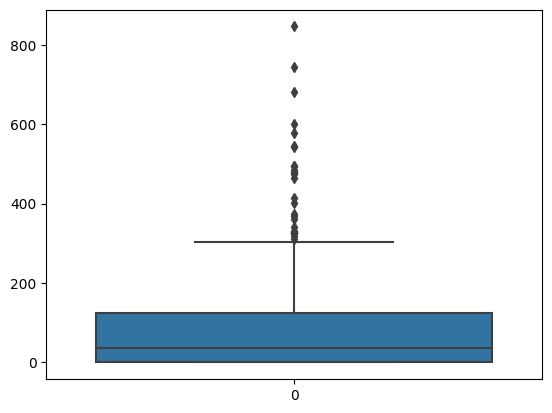

In [20]:
sns.boxplot(data=df['TS'])

Bivariate analysis 

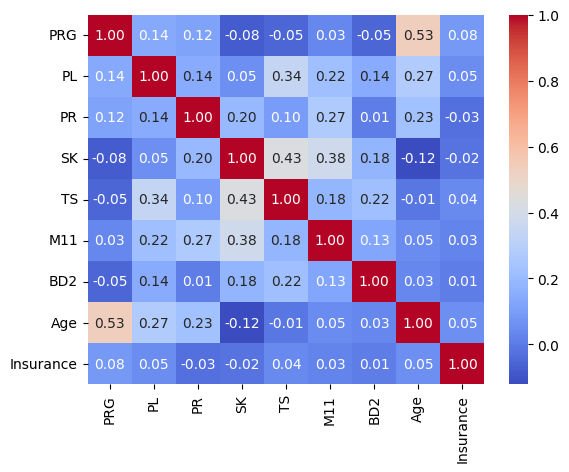

In [21]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()


#### multivariate 

In [22]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

C:\Users\manca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


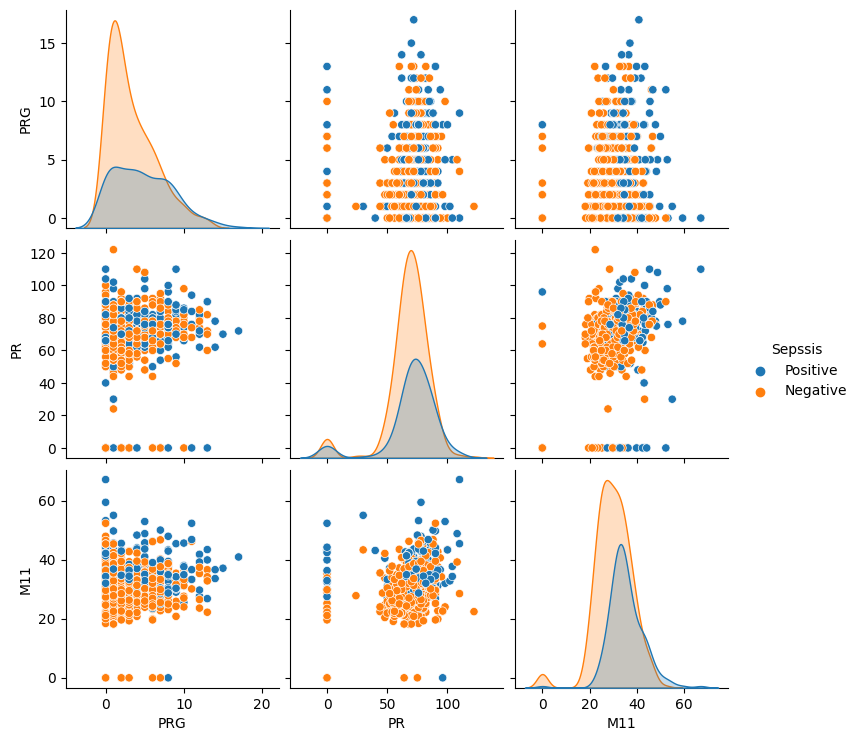

In [23]:
data= df[['Sepssis','PRG','PR','M11']]
sns.pairplot(data,hue='Sepssis')


we use spessis as the shewed

#### Analytical Questions:
1. Is there a relationship between plasma glucose levels and the development of sepsis?
2. What factors are associated with higher blood pressure in the ICU setting?
3. Are there specific factors (e.g., blood work results, BMI, age) associated with the development of sepsis?
4. Identify any trends or patterns in the data related to patient characteristics?

1. Is there a relationship between plasma glucose levels and the development of sepsis?

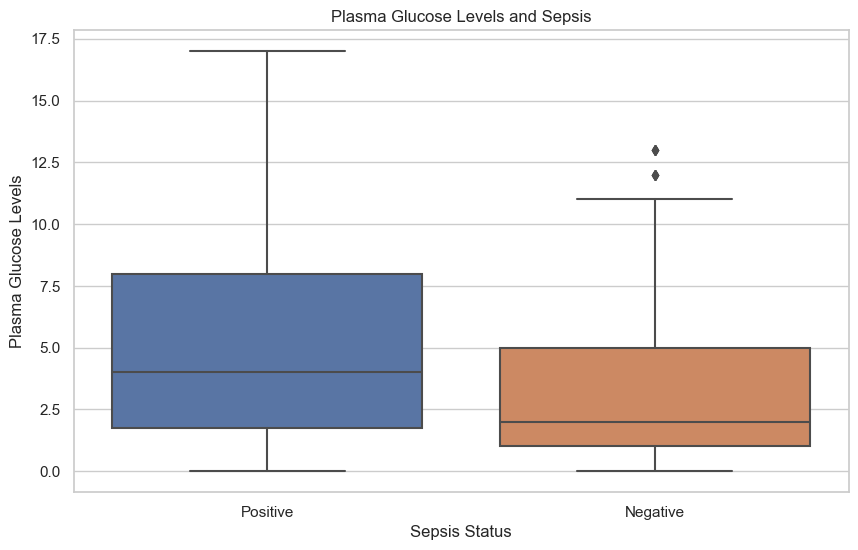

In [24]:
# Filter data for patients with and without sepsis
sepsis_data = df[df['Sepssis'] == 'TPositive']
no_sepsis_data = df[df['Sepssis'] == 'Negative']

# Create a boxplot or violin plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='Sepssis', y='PRG', data=df)
plt.title('Plasma Glucose Levels and Sepsis')
plt.xlabel('Sepsis Status')
plt.ylabel('Plasma Glucose Levels')
# Show the plot
plt.show()

The outliers is on the negative side may represent patients with exceptionally low plasma glucose levels.
These low values could be due to various reasons such as unique medical conditions, or specific patient characteristics.

2. What factors are associated with higher blood pressure in the ICU setting?

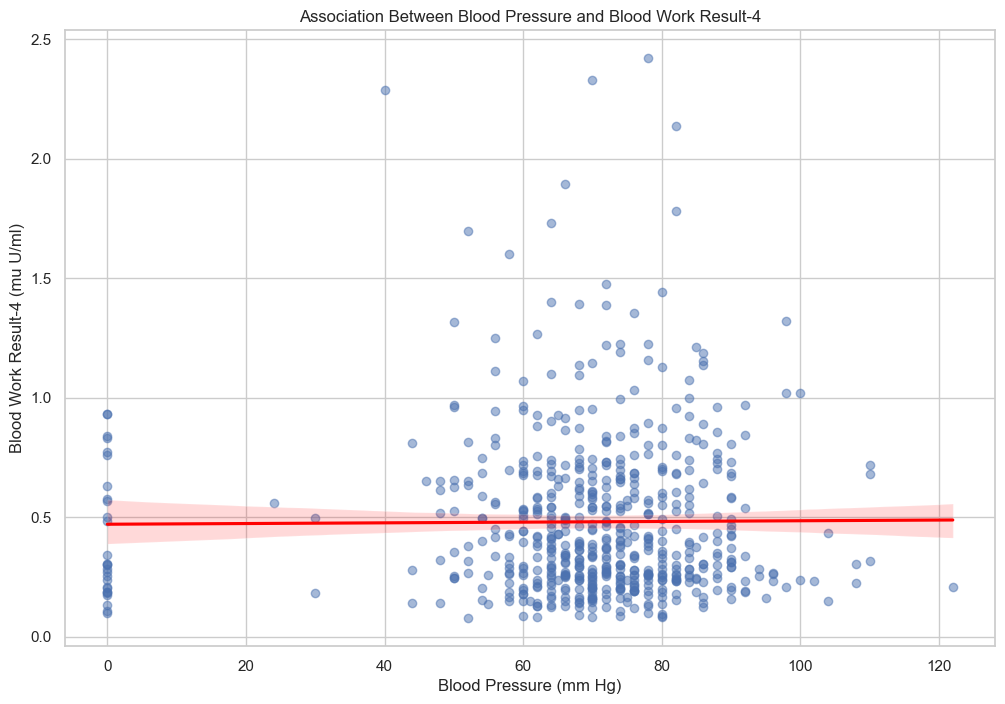

In [25]:
# Create a scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot with regression line
sns.regplot(x='PR', y='BD2', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Association Between Blood Pressure and Blood Work Result-4')
plt.xlabel('Blood Pressure (mm Hg)')
plt.ylabel('Blood Work Result-4 (mu U/ml)')


# Show the plot
plt.show()

The red regression line is fitted to the data points using a regression algorithm. It provides an approximation of the overall trend or relationship between blood pressure and Blood Work Result-4. since the line is nearly flat, it indicates a weak or no correlation between the blood pressure and blood work result-4. since there is a  tightly clustered, it suggests a strong correlation.

3. Are there specific factors (e.g., blood work results, BMI, age) associated with the development of sepsis?

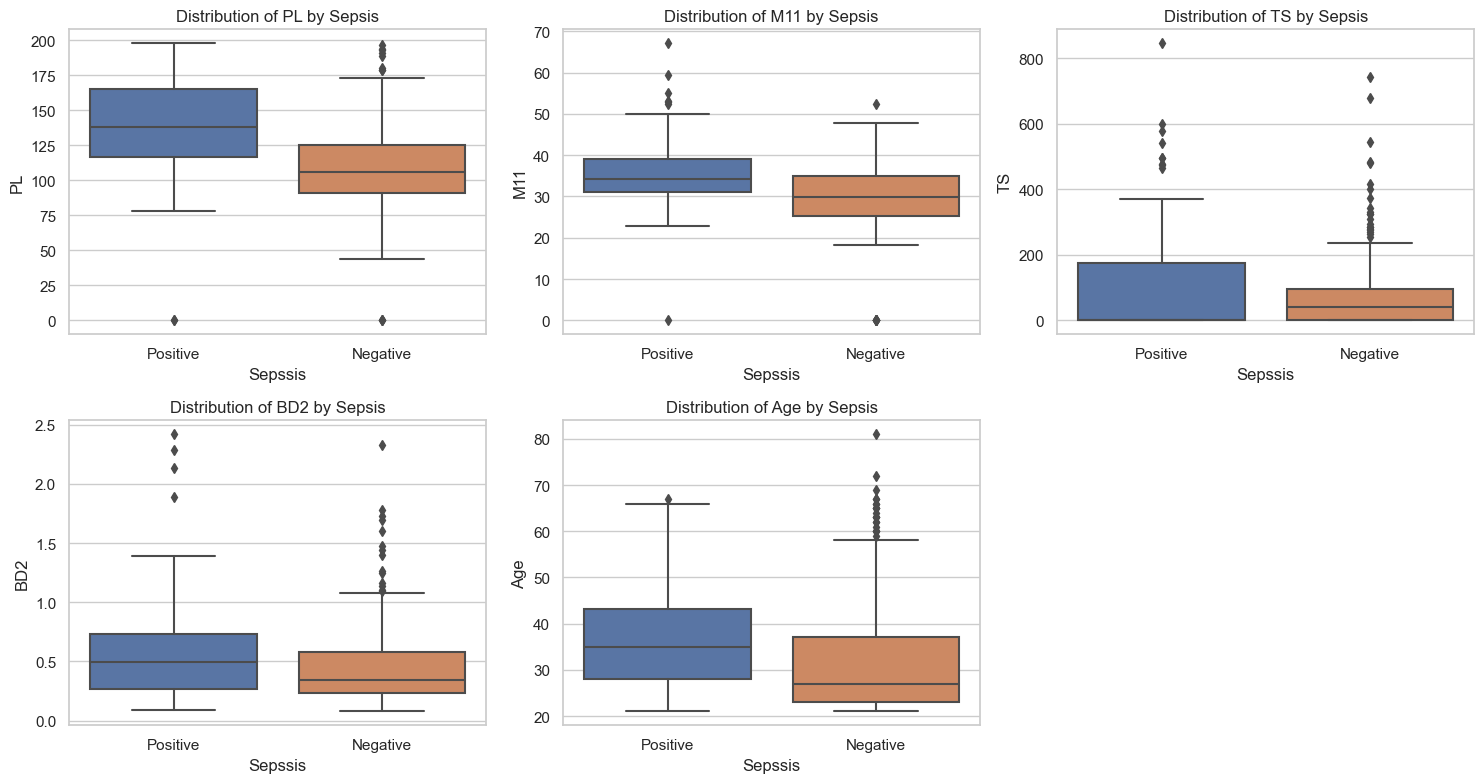

In [26]:
# Select relevant columns
factors = ['PL', 'M11', 'TS', 'BD2', 'Age']

# Create a boxplot for each factor
plt.figure(figsize=(15, 8))
for i, factor in enumerate(factors, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Sepssis', y=factor, data=df)
    plt.title(f'Distribution of {factor} by Sepsis')

plt.tight_layout()
plt.show()

1. PL (Blood Work Result-1):

The boxplots for PL show the distribution of Blood Work Result-1 for patients with and without sepsis. there are noticeable differences in the medians and presence of outliers, on the negative, it suggest that Blood Work Result-1 is not associated with the development of sepsis.




## Data Preparation

In [27]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [28]:
# lets separate the dependent and independent/target variable
X = df.drop(['Sepssis', 'ID'], axis=1)
y = df['Sepssis']

X_test = test.drop('ID',axis =1)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
(X_train.shape, y_train.shape),(X_eval.shape, y_eval.shape),(X_test.shape)

(((479, 9), (479,)), ((120, 9), (120,)), (169, 9))

In [29]:
X

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0
595,0,188,82,14,185,32.0,0.682,22,1
596,0,67,76,0,0,45.3,0.194,46,1
597,1,89,24,19,25,27.8,0.559,21,0


In [30]:
y

0      Positive
1      Negative
2      Positive
3      Negative
4      Positive
         ...   
594    Negative
595    Positive
596    Negative
597    Negative
598    Positive
Name: Sepssis, Length: 599, dtype: object

In [31]:
# Assuming 'Sepssis' is the target variable
df['Sepssis_encoded'] = df['Sepssis'].apply(lambda x: 1 if x == 'Positive' else 0)


In [32]:
df['Sepssis_encoded']

0      1
1      0
2      1
3      0
4      1
      ..
594    0
595    1
596    0
597    0
598    1
Name: Sepssis_encoded, Length: 599, dtype: int64

In [33]:
type(df['Sepssis_encoded'])

pandas.core.series.Series

In [34]:
type(X)

pandas.core.frame.DataFrame

## Modeling 

#### create a pipline 

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.2 KB


In [37]:
input_features = X.columns 
neighbors = KNeighborsClassifier(n_neighbors=3) 


In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler',StandardScaler(),input_features),
        ('log_transformation',FunctionTransformer(np.log1p),input_features)
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('neighbors', KNeighborsClassifier())
])

In [39]:
# Now you can fit and transform your data using the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('neighbors', KNeighborsClassifier())])

In [40]:
Kn_pred = pipeline.predict(X_eval) 

In [42]:
print(classification_report(y_eval,Kn_pred))

              precision    recall  f1-score   support

    Negative       0.77      0.78      0.78        78
    Positive       0.59      0.57      0.58        42

    accuracy                           0.71       120
   macro avg       0.68      0.68      0.68       120
weighted avg       0.71      0.71      0.71       120



### model 2 

In [44]:
# Create a pipeline with preprocessing and logistic regression
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), input_features),
        ('log_transformation', FunctionTransformer(np.log1p), input_features)
    ]
)

logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())
])

In [45]:
# Fit the model
logreg_pipeline.fit(X_train, y_train)

C:\Users\manca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('logreg', LogisticRegression())])

In [46]:

# Make predictions
logreg_pred = logreg_pipeline.predict(X_eval)

# Print the classification report
print(classification_report(y_eval, logreg_pred))

              precision    recall  f1-score   support

    Negative       0.81      0.81      0.81        78
    Positive       0.64      0.64      0.64        42

    accuracy                           0.75       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.75      0.75      0.75       120



### model 3

In [52]:
# Create a pipeline with preprocessing and Decision Tree classifier
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), input_features),
        ('log_transformation', FunctionTransformer(np.log1p), input_features)
    ]
)

In [53]:
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('decision_tree', DecisionTreeClassifier())
])

In [54]:
# Fit the model
decision_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('decision_tree', DecisionTreeClassifier())])

In [55]:
# Make predictions
decision_tree_pred = decision_tree_pipeline.predict(X_eval)

# Print the classification report
print(classification_report(y_eval, decision_tree_pred))

              precision    recall  f1-score   support

    Negative       0.76      0.78      0.77        78
    Positive       0.57      0.55      0.56        42

    accuracy                           0.70       120
   macro avg       0.67      0.66      0.67       120
weighted avg       0.70      0.70      0.70       120



### Evaluation 